In [91]:
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd


In [3]:
diamonds=sns.load_dataset('diamonds')
diamonds.shape

(53940, 10)

In [4]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds=diamonds.sample(n=200,random_state=44)
diamonds.shape

(200, 10)

In [13]:
sns.set_style('dark')


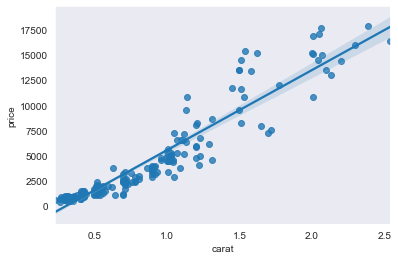

In [17]:
sns.regplot(data=diamonds,x='carat',y='price');

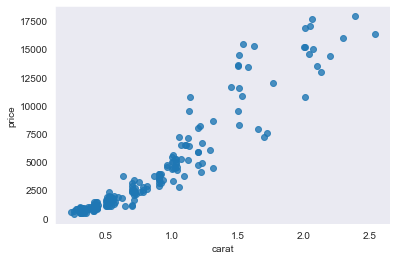

In [19]:
sns.regplot(data=diamonds,x='carat',y='price',fit_reg=False);

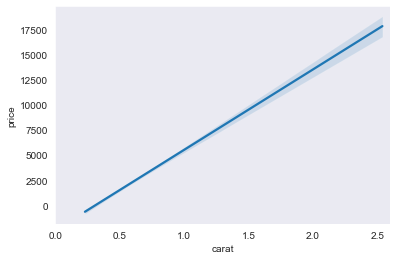

In [24]:
plt.gca().set(xlim=(0,2.6))
sns.regplot(data=diamonds,x='carat',y='price',scatter=False);

In [25]:
diamonds.cut.value_counts()

Ideal        80
Premium      63
Very Good    39
Good         11
Fair          7
Name: cut, dtype: int64

In [26]:
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

diamonds['cut_value'] = diamonds.cut.map(cut_map)

In [40]:
diamonds.cut_value.value_counts()
 

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

In [37]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_value
33039,0.32,Ideal,G,VVS1,61.1,55.0,814,4.45,4.48,2.73,5
17936,1.05,Premium,F,VS2,62.3,59.0,7244,6.50,6.46,4.04,4
33191,0.36,Ideal,F,VS1,61.6,56.0,819,4.62,4.64,2.85,5
16211,1.07,Ideal,H,VS1,60.2,59.0,6479,6.66,6.69,4.02,5
35322,0.31,Ideal,F,VVS1,61.8,56.0,897,4.34,4.36,2.69,5


In [43]:
diamonds['cut_value'] = diamonds['cut_value'].cat.as_ordered()
diamonds['cut_value'] 

33039    5
17936    4
33191    5
16211    5
35322    5
        ..
5032     5
32890    4
20728    4
24994    4
42137    5
Name: cut_value, Length: 200, dtype: category
Categories (5, int64): [5 < 4 < 3 < 2 < 1]

In [45]:
diamonds['cut_value'] .dtype

CategoricalDtype(categories=[5, 4, 3, 2, 1], ordered=True)

In [48]:
diamonds['cut_value'] = diamonds['cut_value'].astype(np.int8)

In [49]:
diamonds['cut_value'] .dtype

dtype('int8')

<AxesSubplot:xlabel='cut_value', ylabel='price'>

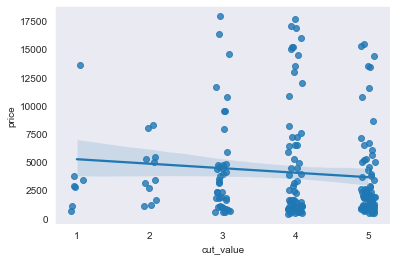

In [53]:
sns.regplot(x='cut_value',y='price',data=diamonds, x_jitter=0.1)
                     

<AxesSubplot:xlabel='cut_value', ylabel='price'>

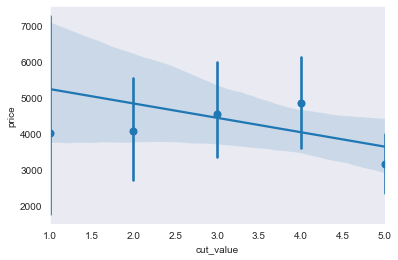

In [55]:
sns.regplot(x='cut_value',y='price',data=diamonds, x_estimator=np.mean)


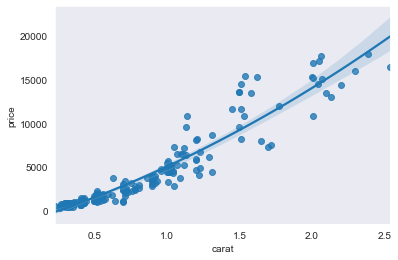

In [57]:
sns.regplot(x='carat', y='price', data=diamonds,
            order=2
            );

In [60]:
cars=sns.load_dataset('mpg')
cars.shape

(398, 9)

In [62]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [65]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [69]:
origin_cyl=(cars.groupby('origin').cylinders.value_counts().unstack().fillna(0))
origin_cyl

cylinders,3,4,5,6,8
origin,,,,,
europe,0.0,63.0,3.0,4.0,0.0
japan,4.0,69.0,0.0,6.0,0.0
usa,0.0,72.0,0.0,74.0,103.0


<AxesSubplot:xlabel='cylinders', ylabel='origin'>

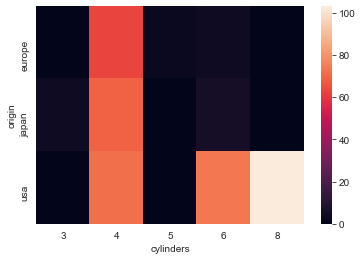

In [71]:
sns.heatmap(origin_cyl)

In [73]:
origin_cyl.T

origin,europe,japan,usa
cylinders,,,
3,0.0,4.0,0.0
4,63.0,69.0,72.0
5,3.0,0.0,0.0
6,4.0,6.0,74.0
8,0.0,0.0,103.0


<AxesSubplot:xlabel='origin', ylabel='cylinders'>

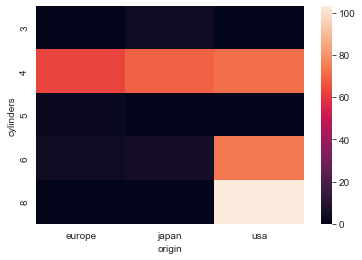

In [75]:
sns.heatmap(origin_cyl.T)

In [77]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

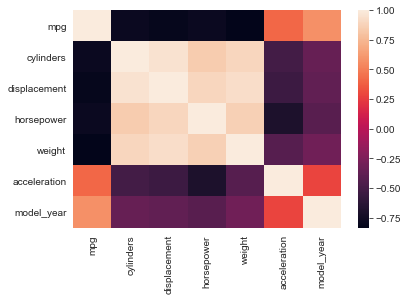

In [78]:
sns.heatmap(cars.corr())

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

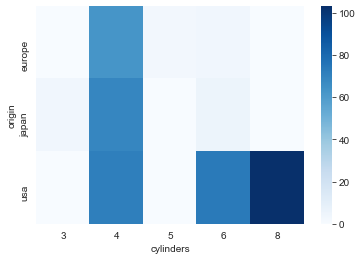

In [80]:
sns.heatmap(origin_cyl,cmap='Blues')

<AxesSubplot:>

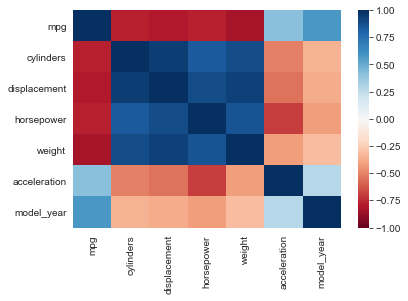

In [83]:
sns.heatmap(cars.corr(),cmap='RdBu',vmin=-1,vmax=1)

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

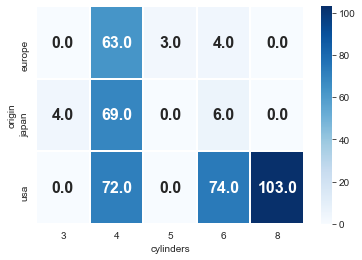

In [92]:
sns.heatmap(origin_cyl,cmap='Blues',annot=True,fmt=".1f",annot_kws={'fontsize':16,'fontweight':'bold'}
,linewidth=1)

In [94]:
df = pd.read_csv('dataset.csv', parse_dates=[3])
df.head()


,SystemCodeNumber,Capacity,Occupancy,LastUpdated
0,BHMBCCMKT01,577,61,2016-10-04 07:59:42
1,BHMBCCMKT01,577,64,2016-10-04 08:25:42
2,BHMBCCMKT01,577,80,2016-10-04 08:59:42
3,BHMBCCMKT01,577,107,2016-10-04 09:32:46
4,BHMBCCMKT01,577,150,2016-10-04 09:59:48


In [96]:
df.rename(columns={'SystemCodeNumber': 'Location', 'LastUpdated': 'Timestamp'}, inplace=True)
df['Day'] = df.Timestamp.dt.date
df['Month'] = df.Timestamp.dt.month
df['Hour'] = df.Timestamp.dt.hour

In [98]:
park = df[df.Location.isin(['Broad Street', 'NIA South'])]
park.head()


,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


In [99]:
sns.set_style('dark')


In [101]:
months = [pd.datetime(2016, 10, 1), pd.datetime(2016, 11, 1), pd.datetime(2016, 12, 1)];
months

<ipython-input-101-f5b46eda7f12>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  months = [pd.datetime(2016, 10, 1), pd.datetime(2016, 11, 1), pd.datetime(2016, 12, 1)];


[datetime.datetime(2016, 10, 1, 0, 0),
 datetime.datetime(2016, 11, 1, 0, 0),
 datetime.datetime(2016, 12, 1, 0, 0)]

In [105]:
plt.rc('date.autoformatter', day='%b %Y')


In [106]:
park.head()

,Location,Capacity,Occupancy,Timestamp,Day,Month,Hour
20171,Broad Street,690,178,2016-10-04 07:59:42,2016-10-04,10,7
20172,Broad Street,690,269,2016-10-04 08:25:42,2016-10-04,10,8
20173,Broad Street,690,415,2016-10-04 08:59:42,2016-10-04,10,8
20174,Broad Street,690,530,2016-10-04 09:32:46,2016-10-04,10,9
20175,Broad Street,690,600,2016-10-04 09:59:48,2016-10-04,10,9


C:\Users\INTEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


([<matplotlib.axis.XTick at 0x19b9078e070>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

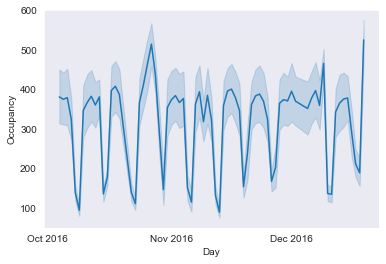

In [110]:
sns.lineplot(park.Day, park.Occupancy)
plt.xticks(months)

C:\Users\INTEL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

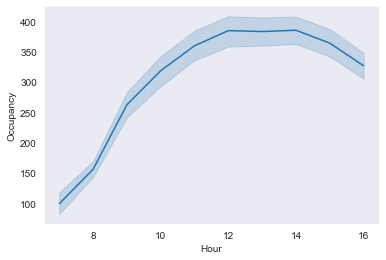

In [112]:
sns.lineplot(park.Hour, park.Occupancy)


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

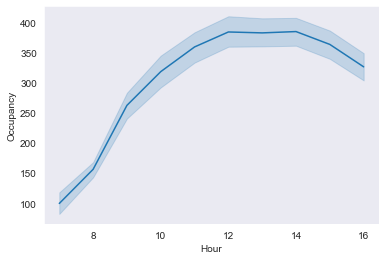

In [114]:
sns.lineplot(x='Hour', y='Occupancy',data=park)


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

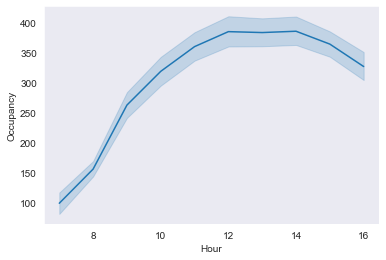

In [117]:
sns.lineplot(x='Hour', y='Occupancy',data=park,n_boot=1000)


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

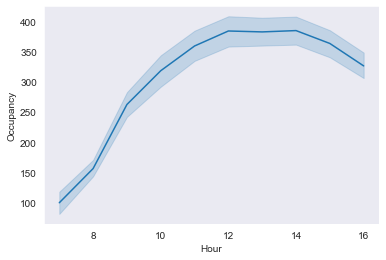

In [119]:
sns.lineplot(x='Hour', y='Occupancy',data=park,ci=95)


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

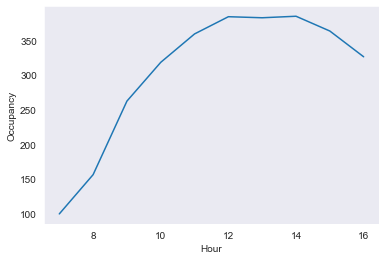

In [121]:
sns.lineplot(x='Hour', y='Occupancy',data=park,ci=None)


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

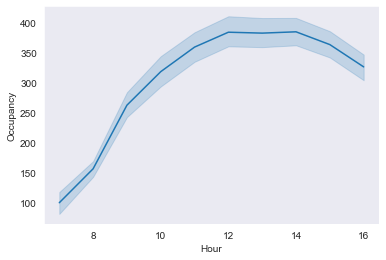

In [123]:
sns.lineplot(x='Hour', y='Occupancy',data=park,estimator='mean')


<AxesSubplot:xlabel='Hour', ylabel='Occupancy'>

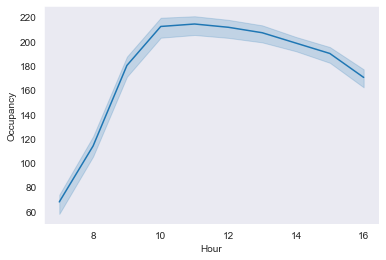

In [124]:
sns.lineplot(x='Hour', y='Occupancy',data=park,estimator='std')
